**Introduction**

Dans le cadre d’une analyse exploratoire des données (EDA) d’un site e-commerce, j’ai mené une étude approfondie pour identifier les tendances clés, les produits les plus populaires et les clients les plus rentables. L’objectif de cette analyse est de fournir des insights exploitables permettant d’optimiser les performances commerciales et de mieux comprendre le comportement des utilisateurs.

Cette étude a été réalisée à partir d’un dataset contenant les transactions enregistrées par le site. Après un nettoyage des données pour éliminer les anomalies (valeurs manquantes et négatives), plusieurs analyses ont été effectuées et synthétisées dans un tableau de bord interactif.

In [12]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture des données
data = pd.read_csv('/kaggle/input/bdecommerce/ecommerce.csv')

# Aperçu des premières lignes
print("Aperçu des données :")
print(data.head())

# Informations générales sur les colonnes et les types de données
print("\nInformations sur les données :")
print(data.info())

# Vérification des statistiques descriptives
print("\nStatistiques descriptives :")
print(data.describe())

Aperçu des données :
   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  Month  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom     12   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom     12   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12   

   TotalPrice  Day  Week ProductCategory  
0       15.30    1    48             Top  
1       20.34    1   

In [13]:
print("\nValeurs manquantes :")
print(data.isnull().sum())


Valeurs manquantes :
InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
Month              0
TotalPrice         0
Day                0
Week               0
ProductCategory    0
dtype: int64


In [14]:
data_cleaned = data.dropna()

In [15]:
# Filtrage des lignes avec des quantités négatives
data_cleaned = data[data['Quantity'] > 0]

# Vérification des lignes restantes
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNo        397924 non-null  int64  
 1   StockCode        397924 non-null  object 
 2   Description      397924 non-null  object 
 3   Quantity         397924 non-null  int64  
 4   InvoiceDate      397924 non-null  object 
 5   UnitPrice        397924 non-null  float64
 6   CustomerID       397924 non-null  float64
 7   Country          397924 non-null  object 
 8   Month            397924 non-null  int64  
 9   TotalPrice       397924 non-null  float64
 10  Day              397924 non-null  int64  
 11  Week             397924 non-null  int64  
 12  ProductCategory  397924 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 39.5+ MB
None


**Ventes mensuelles**

Cette feuille présente la répartition des ventes totales par mois au cours de l’année. Elle permet d’identifier les périodes de forte activité commerciale, telles que les pics saisonniers ou les mois creux. Cette visualisation est essentielle pour planifier les opérations commerciales et les campagnes marketing.

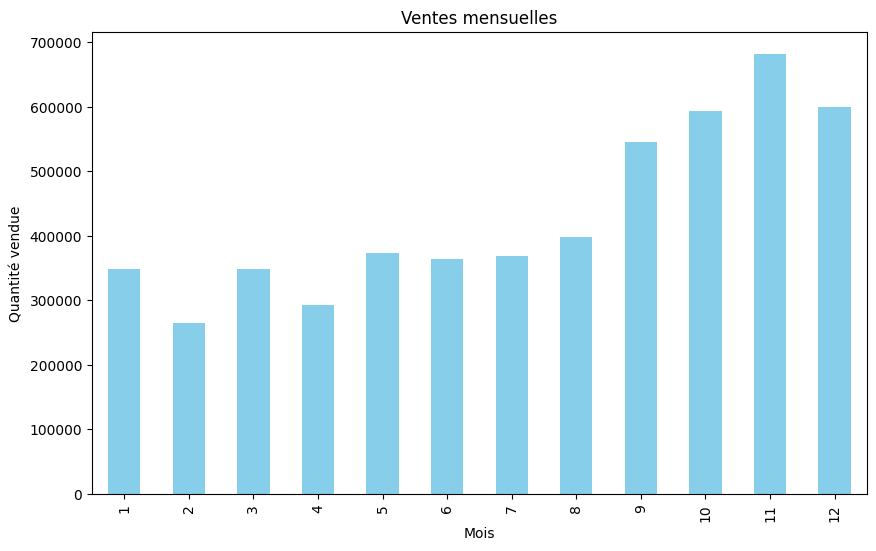

In [16]:
# Convertion 'InvoiceDate' en format datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Ajout d'une colonne pour le mois
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month

# Calcul des ventes par mois
sales_by_month = data_cleaned.groupby('Month')['Quantity'].sum()

# Visualisation
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Ventes mensuelles')
plt.xlabel('Mois')
plt.ylabel('Quantité vendue')
plt.show()

**Top 10 des produits les plus vendus**

Cette feuille met en évidence les dix produits les plus populaires en termes de quantité vendue. Elle offre une vue claire des préférences des clients et aide à prioriser les stocks et la promotion des produits phares.

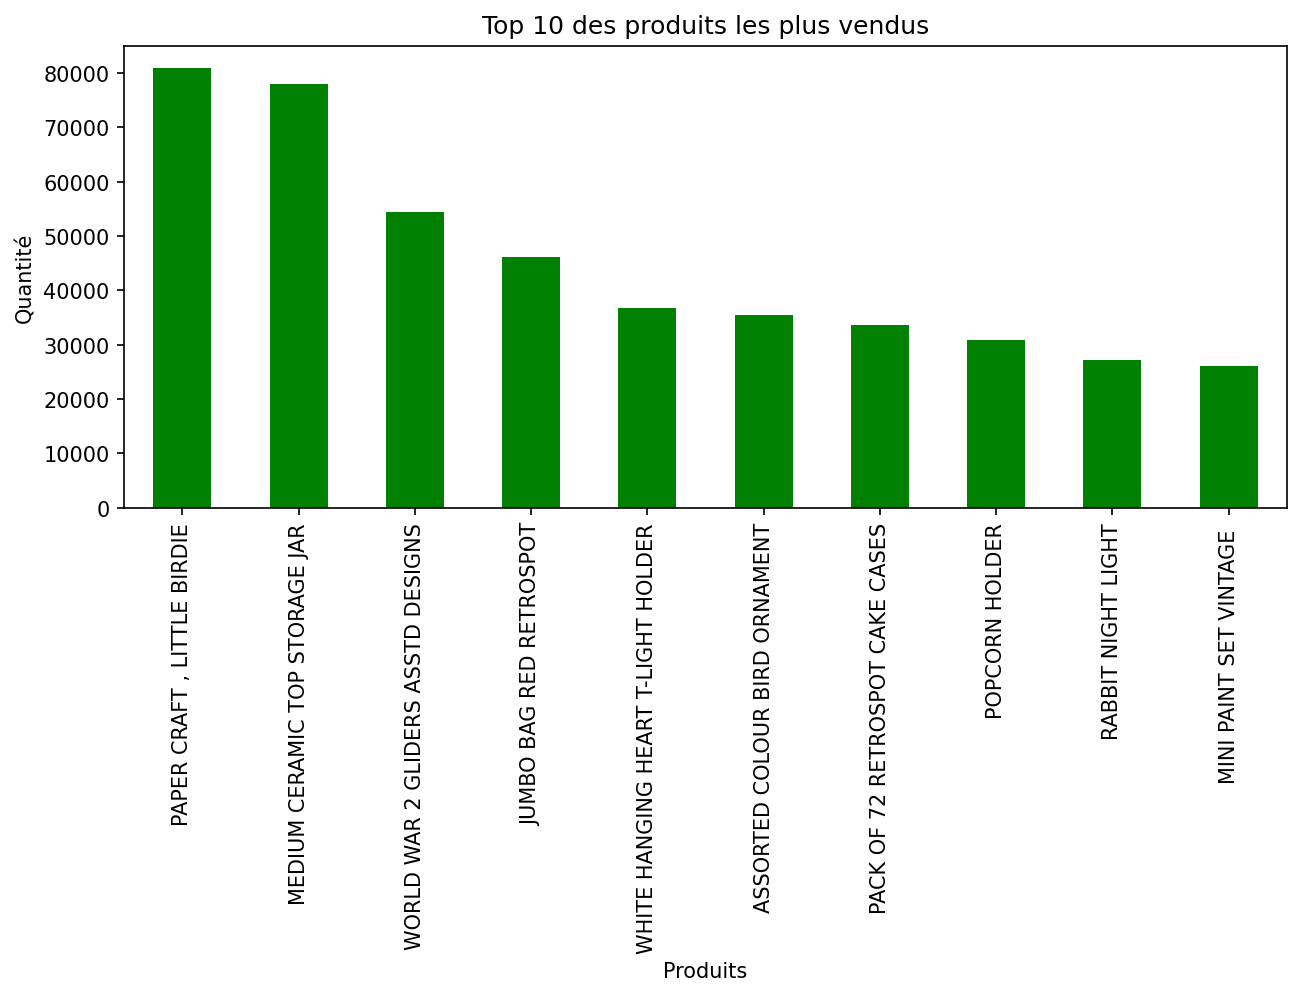

In [17]:
# Regroupement par produit
top_products = data_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Visualisation
plt.figure(figsize=(10, 4), dpi=150)
top_products.plot(kind='bar', color='green')
plt.title('Top 10 des produits les plus vendus')
plt.xlabel('Produits')
plt.ylabel('Quantité')
plt.show()

**Revenu par client**

Cette feuille affiche les clients les plus rentables pour l’entreprise, classés en fonction de leurs dépenses totales. Cet insight permet de concentrer les efforts de fidélisation et d’améliorer les relations avec ces clients stratégiques.

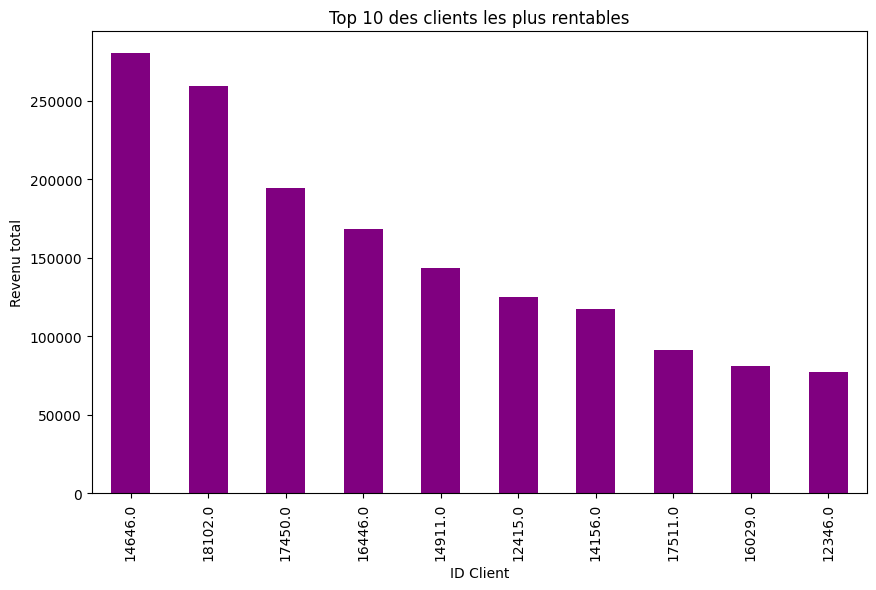

In [18]:
# Ajouter une colonne pour le total des ventes
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

# Calculer les revenus par client
top_customers = data_cleaned.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Visualisation
top_customers.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Top 10 des clients les plus rentables')
plt.xlabel('ID Client')
plt.ylabel('Revenu total')
plt.show()

**Ventes hebdomadaires**

Cette feuille propose une analyse temporelle des ventes sur une base hebdomadaire. Elle aide à détecter les tendances à court terme et à évaluer l’impact des actions spécifiques, comme les promotions ou les lancements de produits.

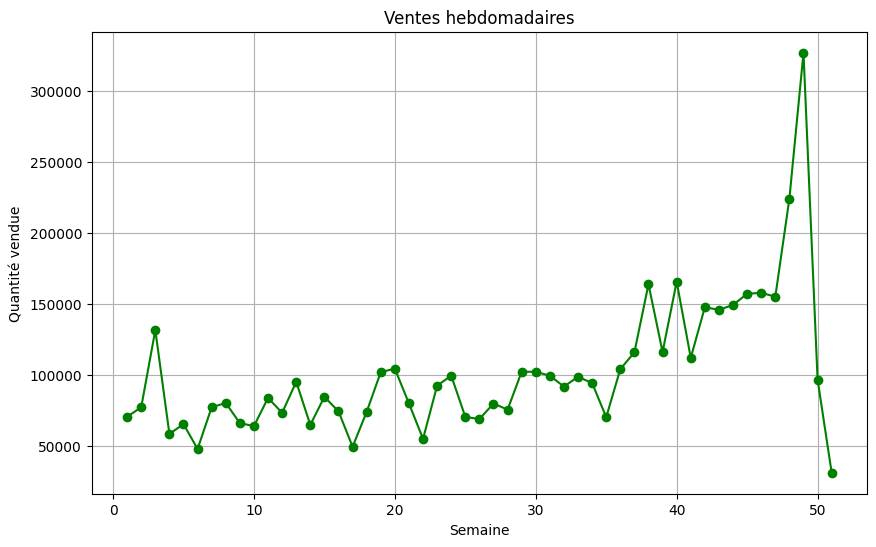

In [19]:
# Ajout des colonnes pour le jour et la semaine
data_cleaned['Day'] = data_cleaned['InvoiceDate'].dt.day
data_cleaned['Week'] = data_cleaned['InvoiceDate'].dt.isocalendar().week

# Calcul des ventes hebdomadaires
sales_by_week = data_cleaned.groupby('Week')['Quantity'].sum()

# Visualisation
plt.figure(figsize=(10, 6))
sales_by_week.plot(kind='line', marker='o', color='green')
plt.title('Ventes hebdomadaires')
plt.xlabel('Semaine')
plt.ylabel('Quantité vendue')
plt.grid(True)
plt.show()

**Segmentation des produits**

**Objectif** : Catégoriser les produits en fonction de leurs performances.

Identifie des catégories comme "**top**", "**moyen**", "**bas**" selon les ventes :

In [20]:
# Ajout d'une colonne pour la segmentation des produits
data_cleaned['ProductCategory'] = pd.qcut(data_cleaned.groupby('Description')['Quantity'].transform('sum'), q=3, labels=['Bas', 'Moyen', 'Top'])

# Vérifier la distribution
print(data_cleaned['ProductCategory'].value_counts())

ProductCategory
Bas      132887
Top      132623
Moyen    132414
Name: count, dtype: int64
